In [7]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

os.getcwd()

'n:\\Torbedo\\Software Traning\\img\\Image Processing Session 3\\tasks\\Task2'

In [8]:
def make_fig(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        image = images[i]
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
        plt.title(titles[i])
    plt.show()

def make_fig_gray(images, titles, plots, size):
    fig = plt.figure(figsize=size)
    for i in range(len(images)):
        fig.add_subplot(plots[0], plots[1], i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
    plt.show()

def display_image(image, title='original', colored=None):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
    else:
        plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.title(title)
    plt.show()

def display2Images(img1, img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

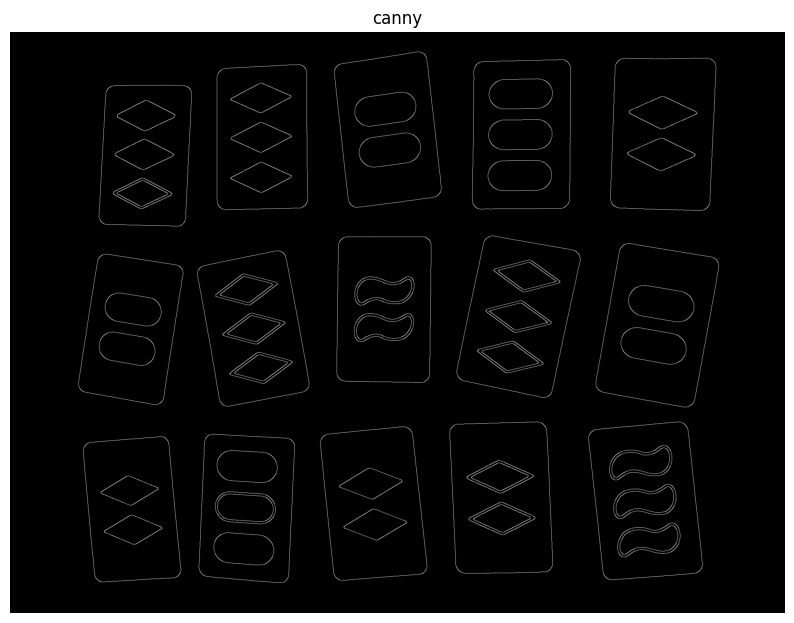

In [9]:
img = cv.imread('cards/Ttpvb.jpg')
img_copy = img.copy()
#display_image(img_copy)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#display_image(gray,"gray")
gaussian = cv.GaussianBlur(gray, (9, 9), 0)
#display_image(gaussian,"gaussian_blur_stronger")

median = cv.medianBlur(gaussian, 9)
#display_image(median,"median+ gauusian")

canny = cv.Canny(median,50,130)
display_image(canny,"canny")

kernel = np.ones((3, 3), np.uint8)
#dilated = cv.dilate(canny, kernel, iterations=1)
#display_image(dilated ,"dilated")

Number of contours 15
[[[ 430 1169]]

 [[ 429 1170]]

 [[ 428 1170]]

 ...

 [[ 433 1169]]

 [[ 432 1169]]

 [[ 431 1169]]]


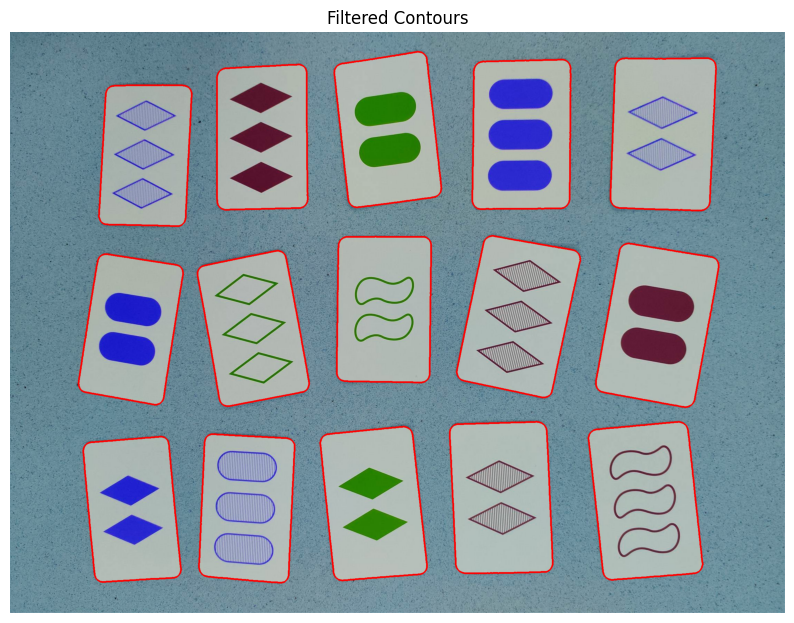

In [10]:

contours, hierarchy = cv.findContours(canny , cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

filtered_contours = []

min_area = 10000
for contour in contours:
    area = cv.contourArea(contour)
    if area > min_area:
        filtered_contours.append(contour)


cv.drawContours(img_copy, filtered_contours, -1, (255, 0, 0), 3)
print(f"Number of contours {len(filtered_contours)}")
print(contours[0])
display_image(img_copy, "Filtered Contours")


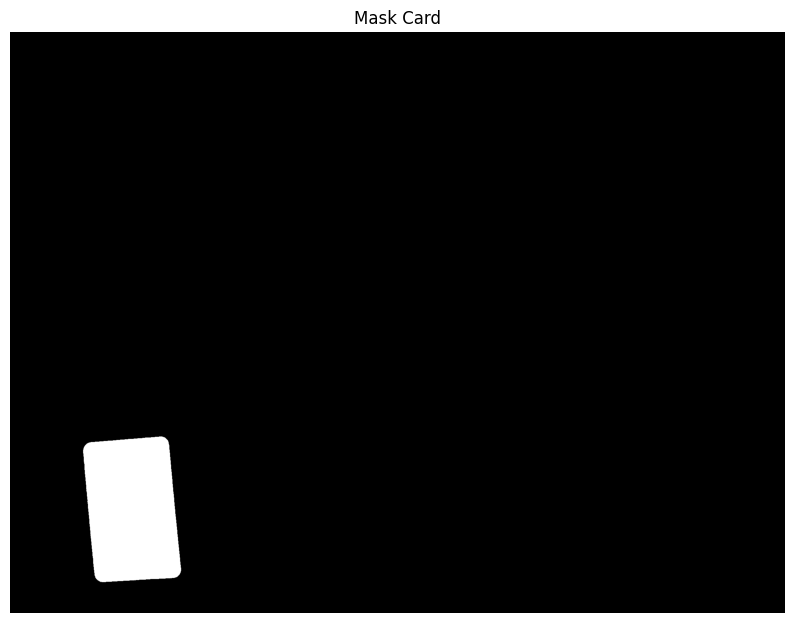

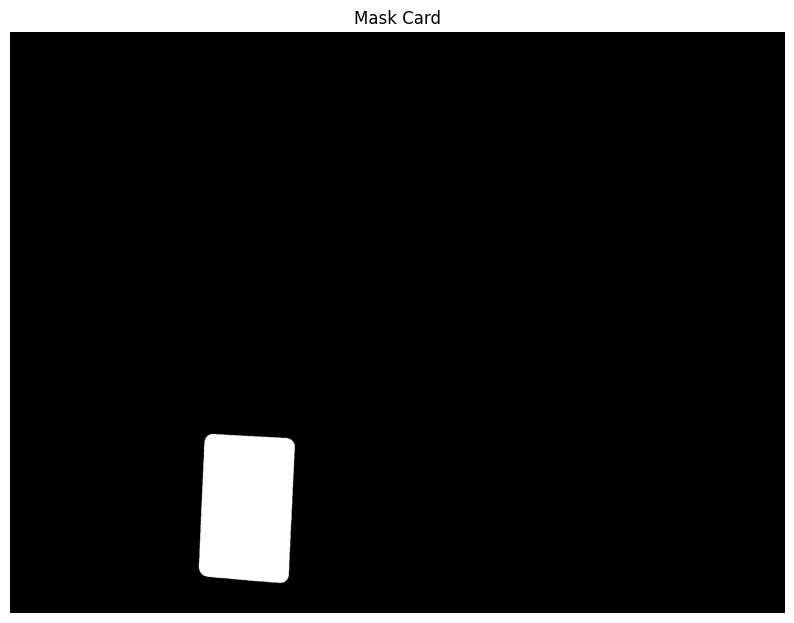

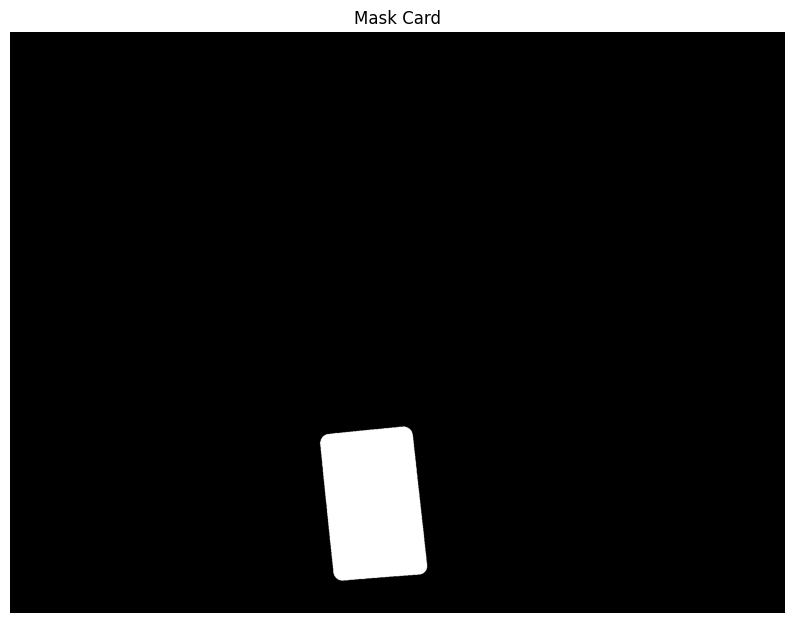

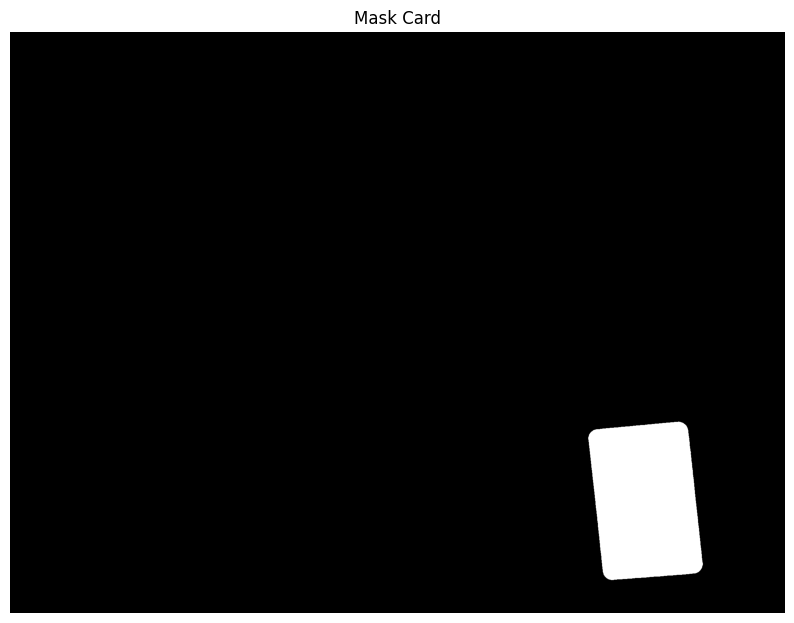

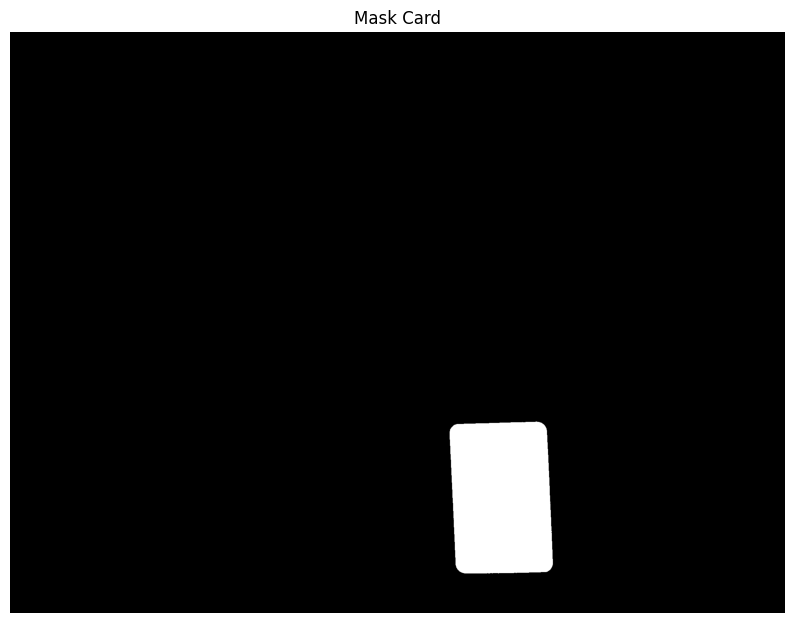

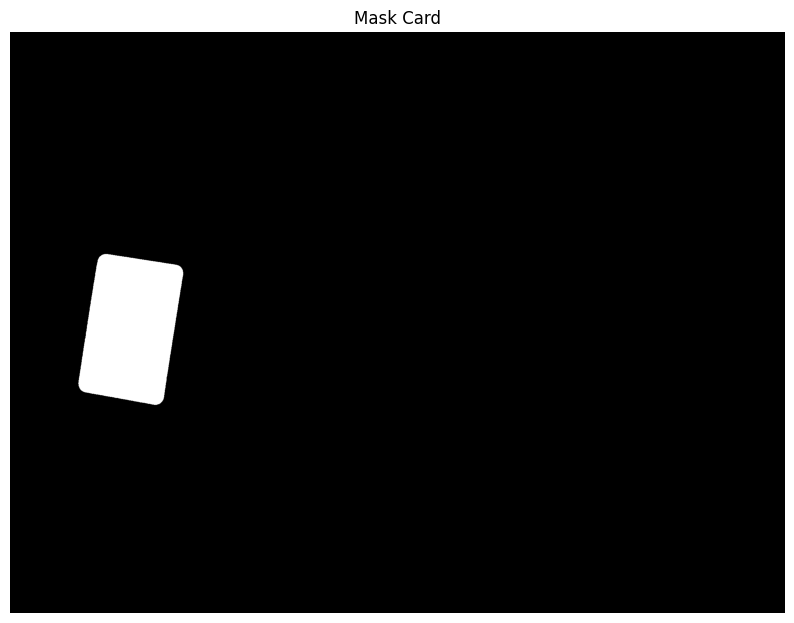

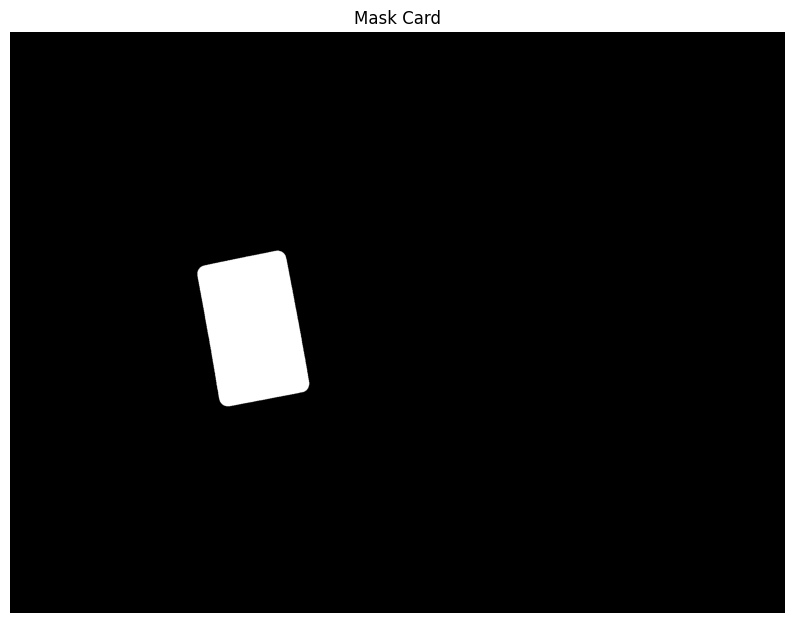

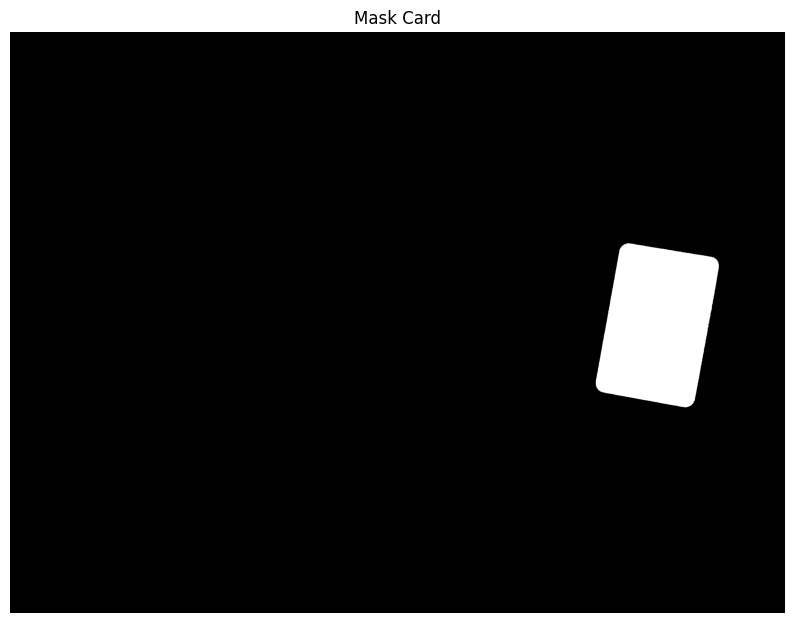

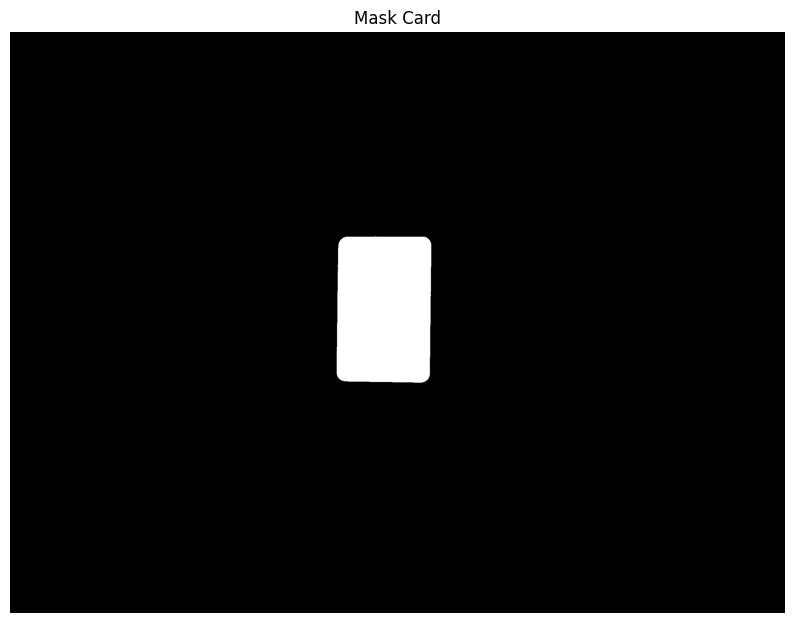

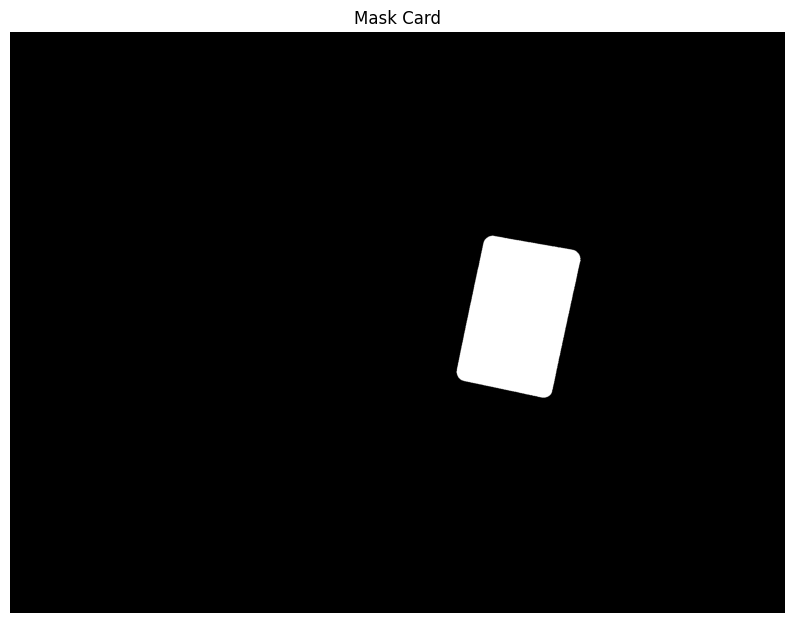

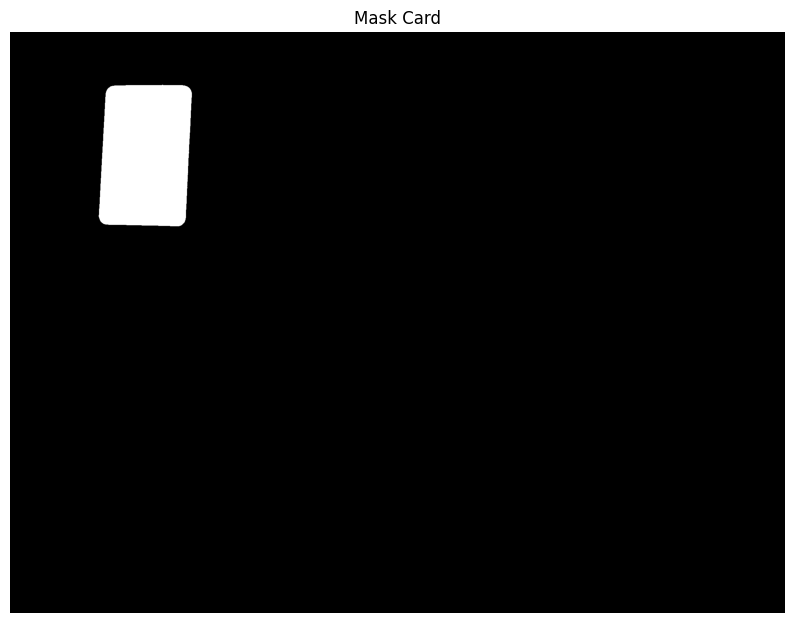

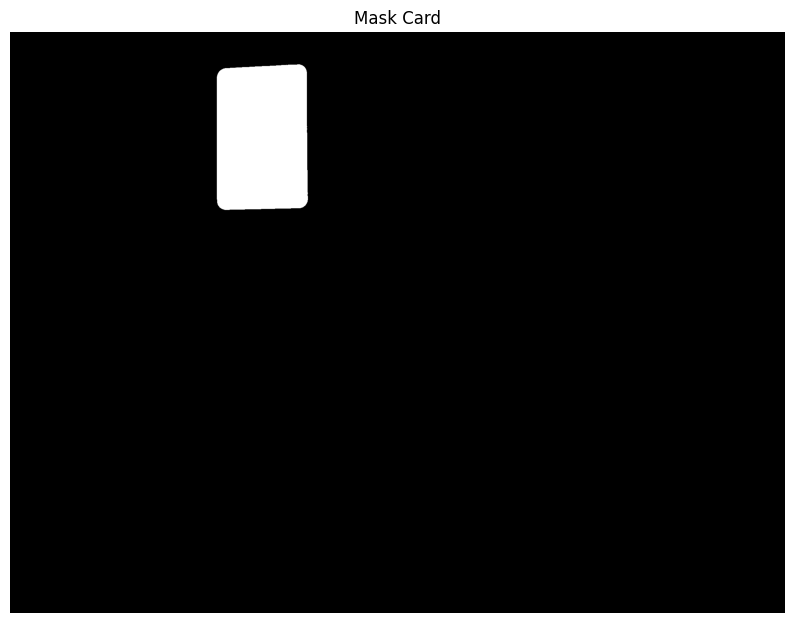

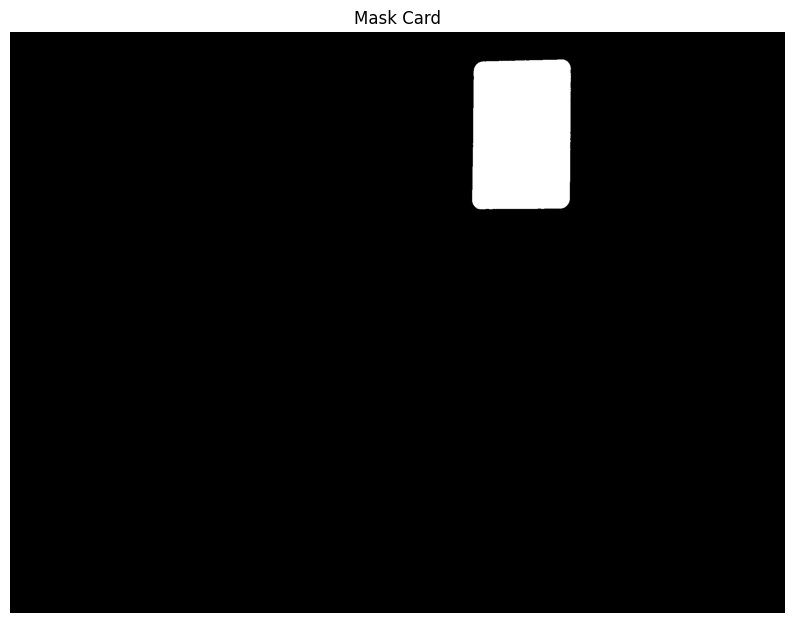

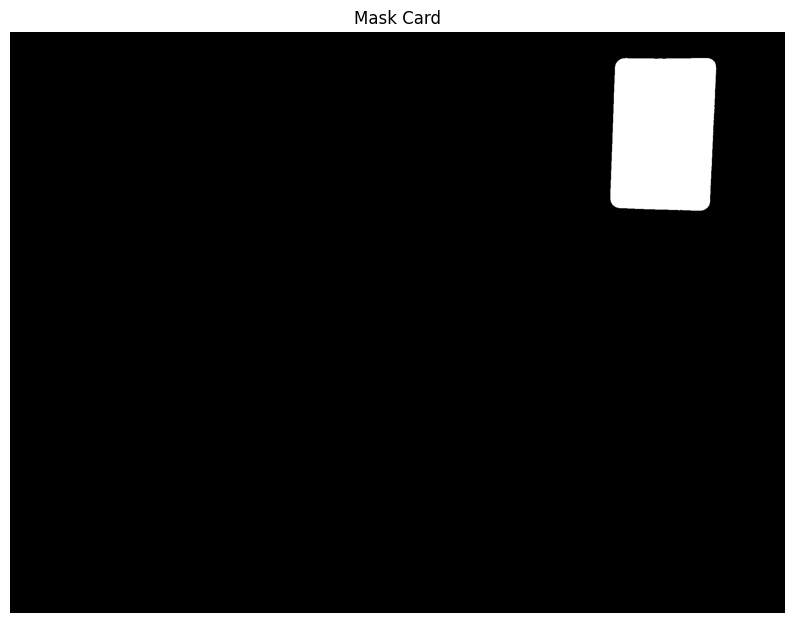

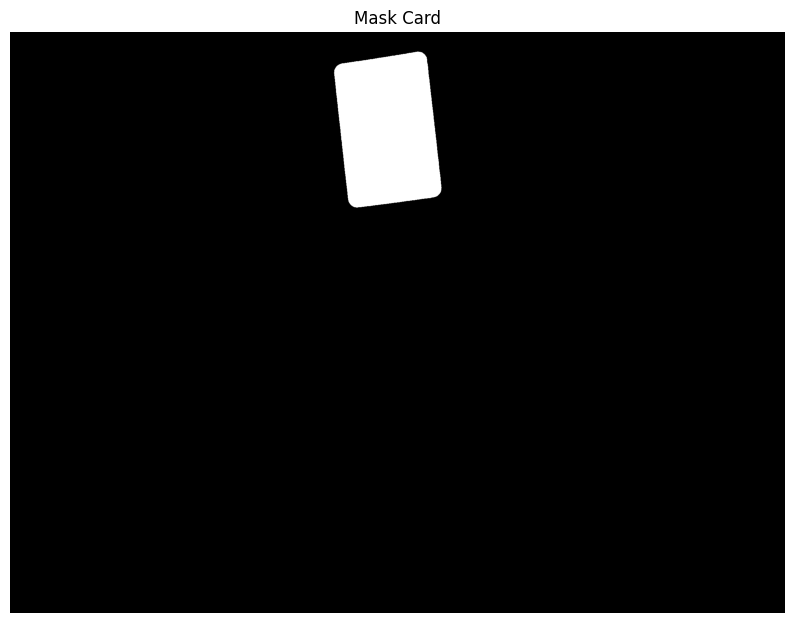

In [12]:
for contour in filtered_contours:
    mask = np.zeros(img.shape[:2], np.uint8)
    cv.drawContours(mask, [contour],-1, 255, -1)
    #masked = cv.bitwise_and(img, img, mask=mask)
    display_image(mask, "Mask Card")
